# Task 6.2: Exploring Relationships

### This script contains the following:

#### 1. Importing Libraries and Dataset
#### 2. Identify variables for Exploratory Visual Analysis
#### 3. Create a Correlation Matrix Heatmap
#### 4. Create a Scatterplot
#### 5. Create a Pair Plot of the entire dataset 
#### 6. Create Categorial Plot
#### 7. Answering Questions
#### 8. Define a Hypothesis

#### 1. Importing Libraries and Dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Achievement6'

# import the dataset
df = pd.read_csv(os.path.join(path, 'Project', 'Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'), index_col=False)

In [3]:
# displaying the loaded dataframe
print(df.shape)
df.head()

(430560, 13)


,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,01/31/2020,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,09/24/2023,02/01/2020,02/29/2020,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,09/24/2023,03/01/2020,03/31/2020,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,09/24/2023,04/01/2020,04/30/2020,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,09/24/2023,05/01/2020,05/31/2020,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


### 2. Identify Variables for Exploratory Visual Analysis

##### The following variables have been identified:
- Year
- Month
- State
- Condition Group
- Condition
- Age Group
- COVID-19 Deaths
- Number of Mentions

In [4]:
# create a subset which contains only the required variables for exploratory visual analysis
df_sub = df[['Year', 'Month', 'State', 'Condition Group', 'Condition', 'Age Group','COVID-19 Deaths', 'Number of Mentions']]


In [5]:
# Since the columns State, Condition Group, Condition and Age Group are not numerical in nature, we need to convert to type 'Category' for displaying the values in heatmap, scatterplots etc
categorial_columns = ['State', 'Condition Group', 'Condition', 'Age Group']
for column in categorial_columns:
    df_sub[column] = df_sub[column].astype('category').cat.codes

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                430560 non-null  float64
 1   Month               430560 non-null  float64
 2   State               430560 non-null  int8   
 3   Condition Group     430560 non-null  int8   
 4   Condition           430560 non-null  int8   
 5   Age Group           430560 non-null  int8   
 6   COVID-19 Deaths     430560 non-null  float64
 7   Number of Mentions  430560 non-null  float64
dtypes: float64(4), int8(4)
memory usage: 14.8 MB


C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_12720\3149104755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[column] = df_sub[column].astype('category').cat.codes
C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_12720\3149104755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[column] = df_sub[column].astype('category').cat.codes
C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_12720\3149104755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

### 3. Create a Correlation Matrix Heatmap

In [6]:
#correlation matrix using pandas
df_sub.corr()

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
Year,1.000000e+00,-1.322529e-01,-2.265890e-11,2.204744e-13,7.042147e-14,-2.103677e-14,-0.069704,-0.069248
Month,-1.322529e-01,1.000000e+00,-1.185940e-14,2.073373e-16,1.997066e-17,-1.506794e-17,0.007995,0.007928
State,-2.265890e-11,-1.185940e-14,1.000000e+00,-2.050765e-17,-2.410199e-14,9.973261e-15,-0.014580,-0.013234
Condition Group,2.204744e-13,2.073373e-16,-2.050765e-17,1.000000e+00,6.493454e-01,-2.222807e-21,-0.048362,-0.064499
Condition,7.042147e-14,1.997066e-17,-2.410199e-14,6.493454e-01,1.000000e+00,4.217851e-17,-0.063338,-0.075375
Age Group,-2.103677e-14,-1.506794e-17,9.973261e-15,-2.222807e-21,4.217851e-17,1.000000e+00,0.157827,0.161616
COVID-19 Deaths,-6.970392e-02,7.994994e-03,-1.457990e-02,-4.836154e-02,-6.333796e-02,1.578268e-01,1.000000,0.989008
Number of Mentions,-6.924794e-02,7.928456e-03,-1.323384e-02,-6.449856e-02,-7.537480e-02,1.616165e-01,0.989008,1.000000


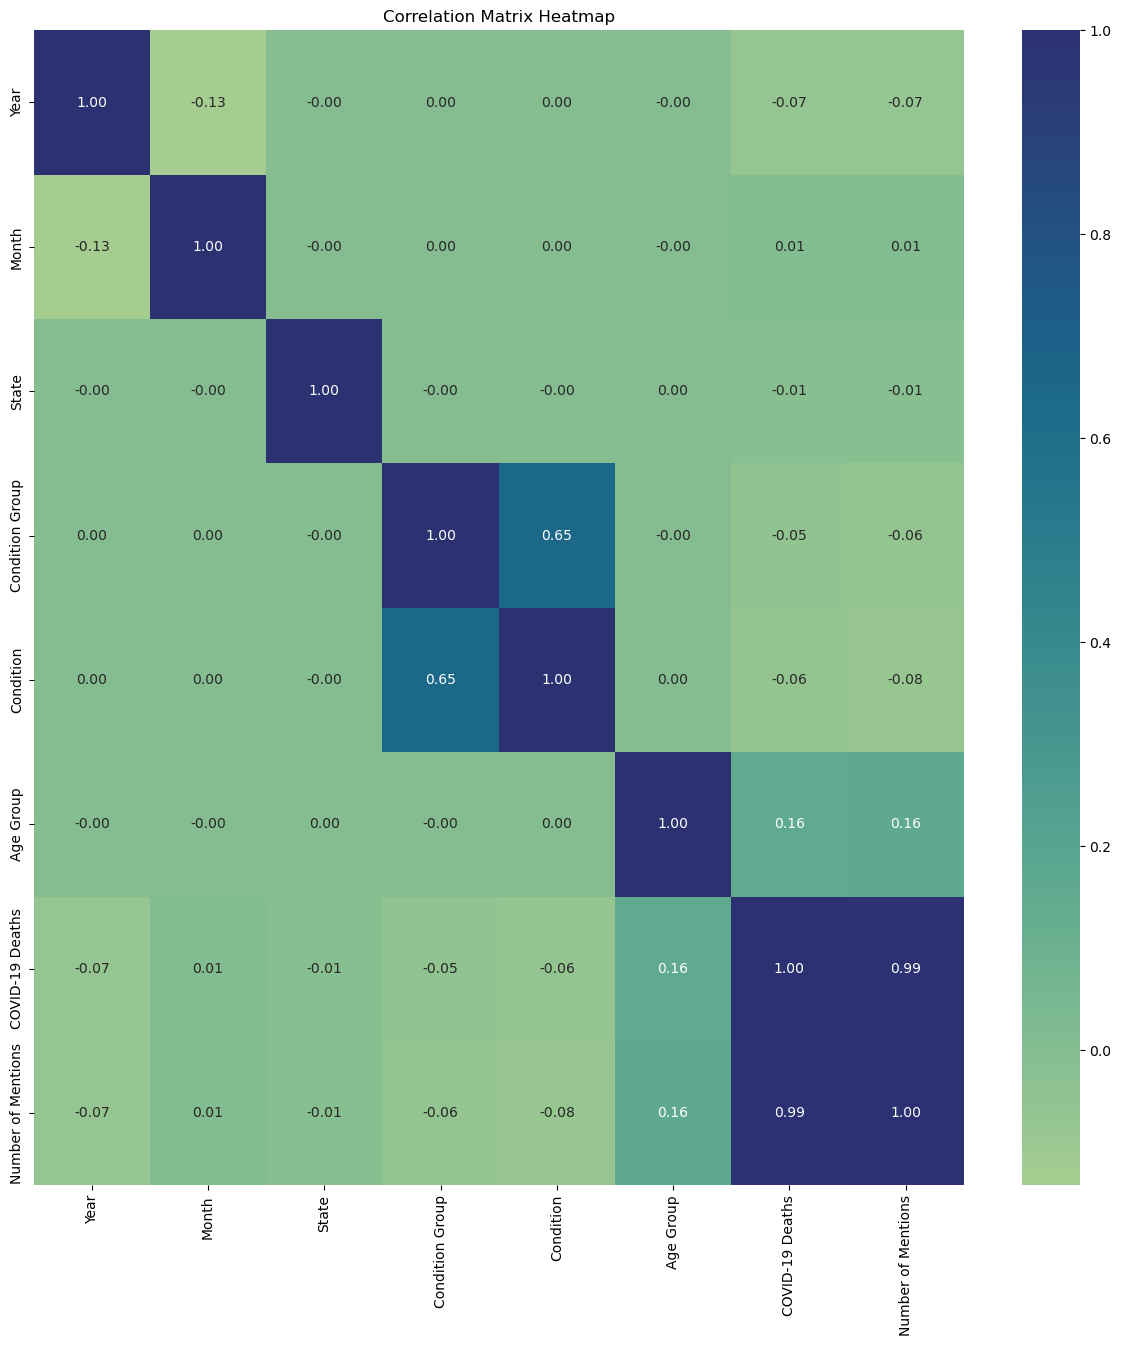

In [7]:
# create a subplot
f,ax = plt.subplots(figsize=(15,15))
plt.title('Correlation Matrix Heatmap')
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_map = sns.heatmap(df_sub.corr(), annot=True, ax=ax, fmt='.2f', cmap= 'crest')
plt.savefig(os.path.join(path,'Project', 'Visualizations', 'Corr_matrix_heat_map.png'))

#### According to the Correlation Matrix Heatmap:
#### - There is a week positive relationship (0.16) between Age Group and COVID-19 Deaths/Number of Mentions.
#### - There is a strong positive relationship (0.99) between COVID-19 Deaths and Number of Mentions.
#### - There is a week negative relationship (-0.05 & -0.06) between  Condition Group/Condition and COVID-19 Deaths. 

### 4. Create a Scatterplot

Text(0.5, 1.0, 'Scatterplot of Number of Mentions Vs COVID-19 Deaths')

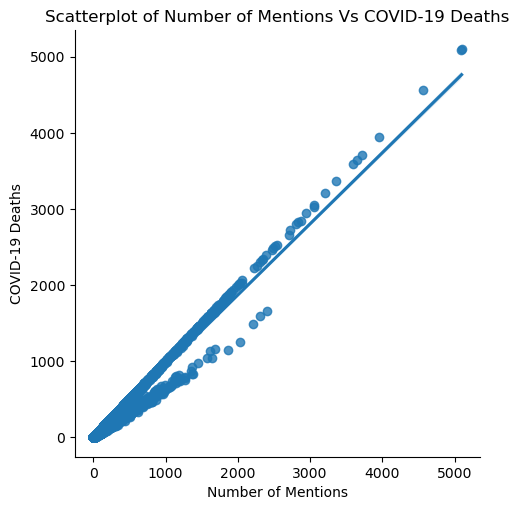

In [8]:
# create a scatterplot for COVID-19 Deaths and Number of mentions
scatterplot1 = sns.lmplot(x='Number of Mentions', y='COVID-19 Deaths', data=df_sub)
plt.title('Scatterplot of Number of Mentions Vs COVID-19 Deaths')


##### Here there is a strong positive replationship between COVID-19 Deaths and Number of Mentions of conditions

Text(0.5, 1.0, 'Scatterplot of Year Vs COVID-19 Deaths')

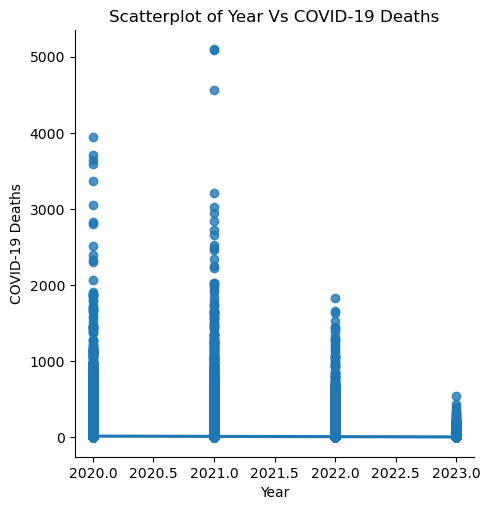

In [9]:
# create a scatterplot for year and COVID-19 Deaths
scatterplot2 = sns.lmplot(x='Year', y='COVID-19 Deaths', data=df_sub)
plt.title('Scatterplot of Year Vs COVID-19 Deaths')

#### From the above diagram we can infer that, COVID-19 Deaths were more in the yeras 2020 and 2021. Afterwards there is a decreasing trend towards 2022 and 2023.

### 5. Create a Pair Plot of the entire dataset

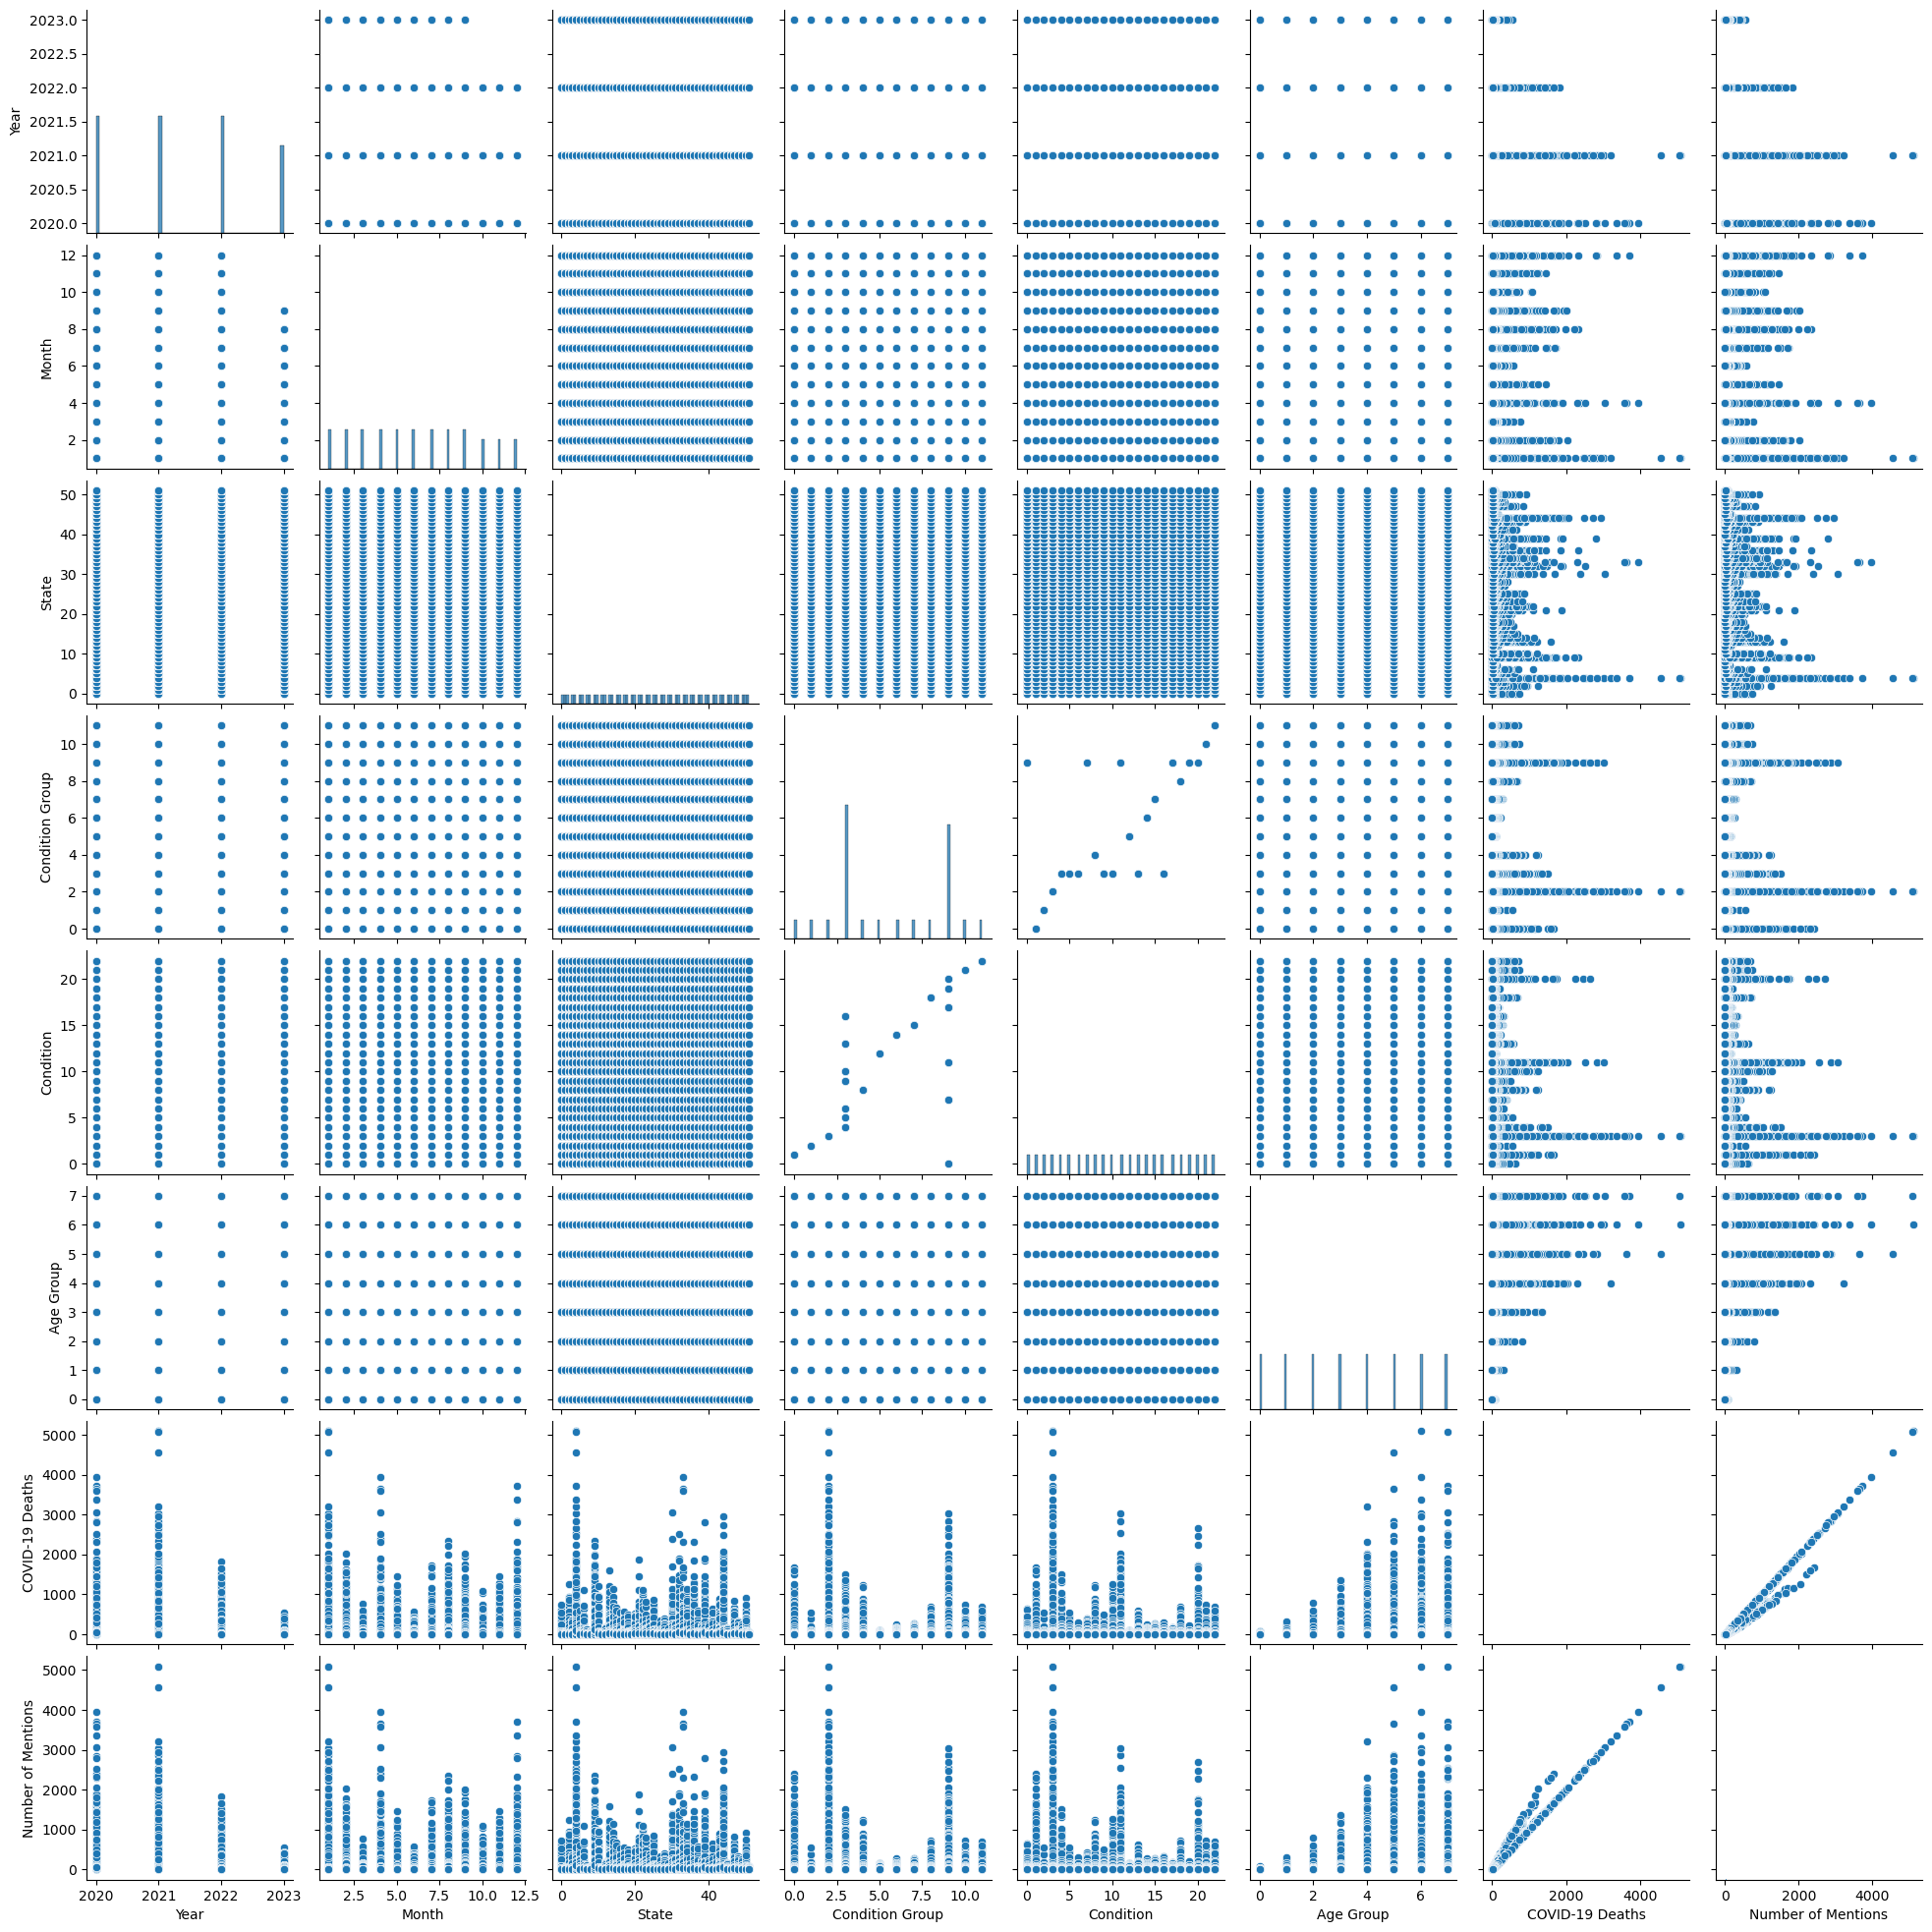

In [10]:
# create a pairplot
pairplot = sns.pairplot(df_sub)

##### The insights derived from the above Pairplot are:
##### - As years passes by, the number of COVID-19 Deaths is decreasing
##### - As Age Group increases, COVID-19 Deaths also increases
##### - As Number of Mentions of condition increases, COVID-19 Deaths also increases 

### 6. Create Categorial Plot

In [11]:
# create the list of 4 regions
Young_age = ['0-24','25-34']
Middle_age = ['35-44','45-54','55-64']
Old_age = ['65-74','75-84','85+']

In [12]:
# deriving the column 'region' with loc()
df.loc[df['Age Group'].isin(Young_age),'Age Category'] = 'Young Age'
df.loc[df['Age Group'].isin(Middle_age),'Age Category'] = 'Middle Age'
df.loc[df['Age Group'].isin(Old_age),'Age Category'] = 'Old Age'

# displaying the contents of the column region
df['Age Category'].value_counts(dropna = False)

Age Category
Middle Age    161460
Old Age       161460
Young Age     107640
Name: count, dtype: int64

C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_11392\2526621256.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(),


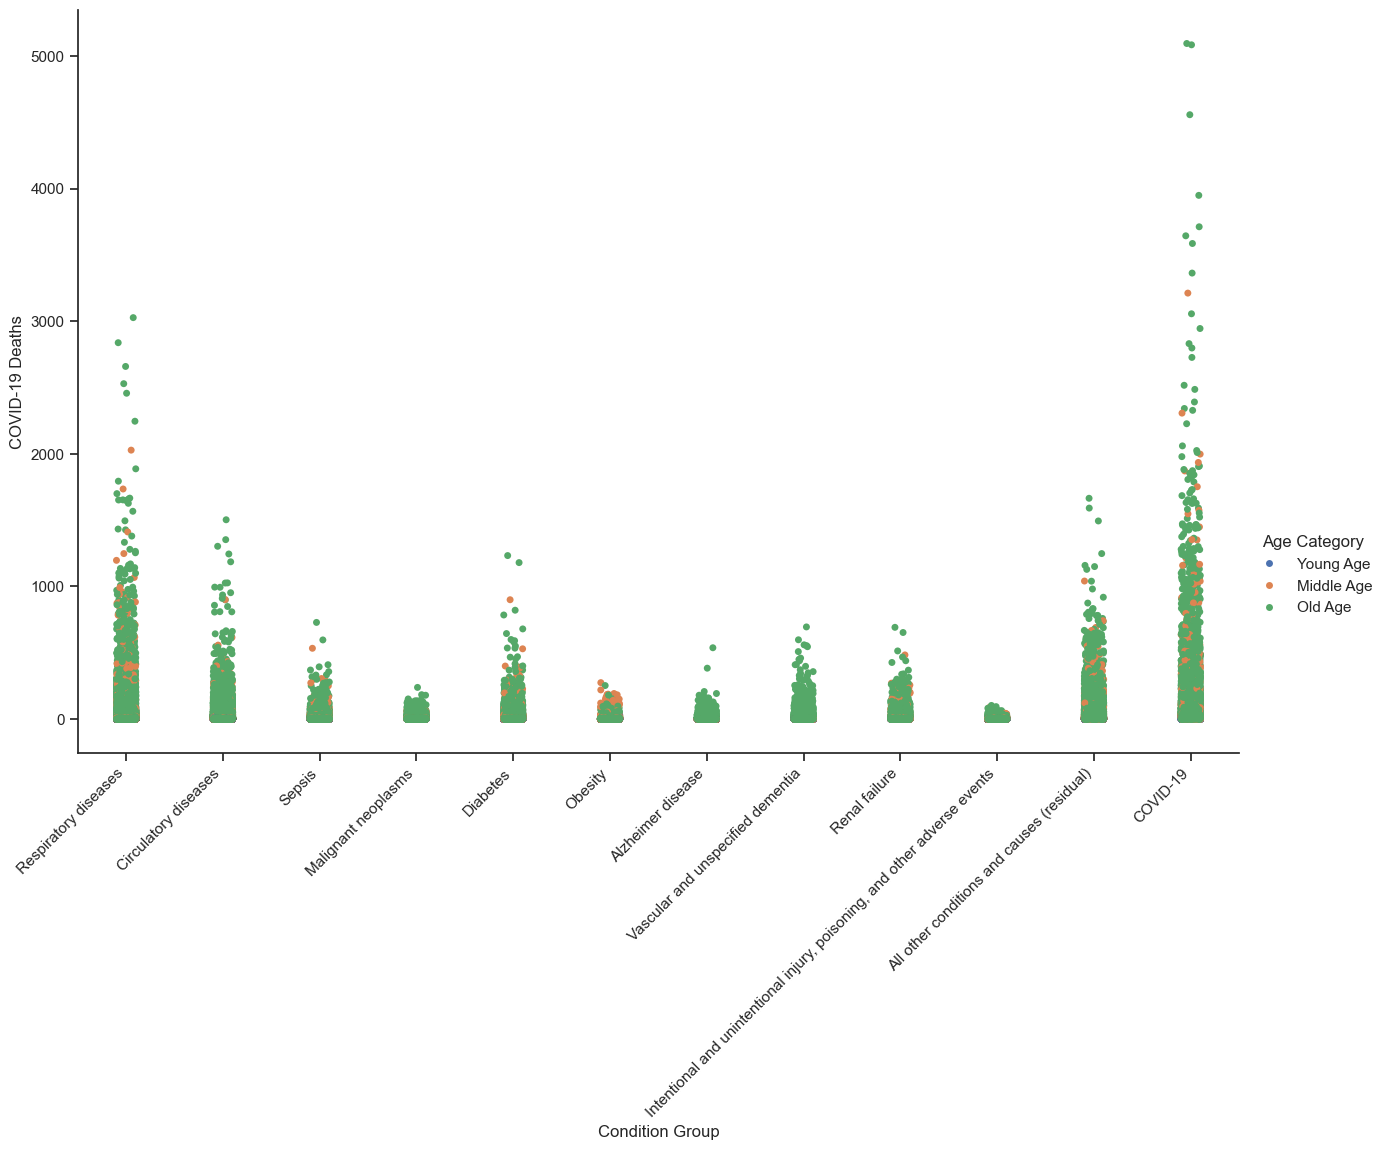

In [13]:
# Create a categorical plot in seaborn
sns.set(style='ticks')
categorialplot =sns.catplot(x='Condition Group', y='COVID-19 Deaths', hue='Age Category',data=df,height=8.27, aspect=12.7/8.27) 

#to display xaxis labels at the corrent position
for axes in categorialplot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), 
                         rotation=45, 
                         horizontalalignment='right')

##### From the above categorial plot we can infer following:
##### Top 5 common conditions contributing to COVID-19 Deaths are:
#####          -- COVID-19
#####          -- Respiratory diseases
#####          -- Circulatory diseases
#####          -- All other conditions and causes(residual)
#####          -- Diabetes
##### It is also evident that people in old age category (above 65+ years of age) are highly affected by COVID-19  

Text(0.5, 1.0, 'Categorial Plot of Age Group Vs COVID-19 Deaths')

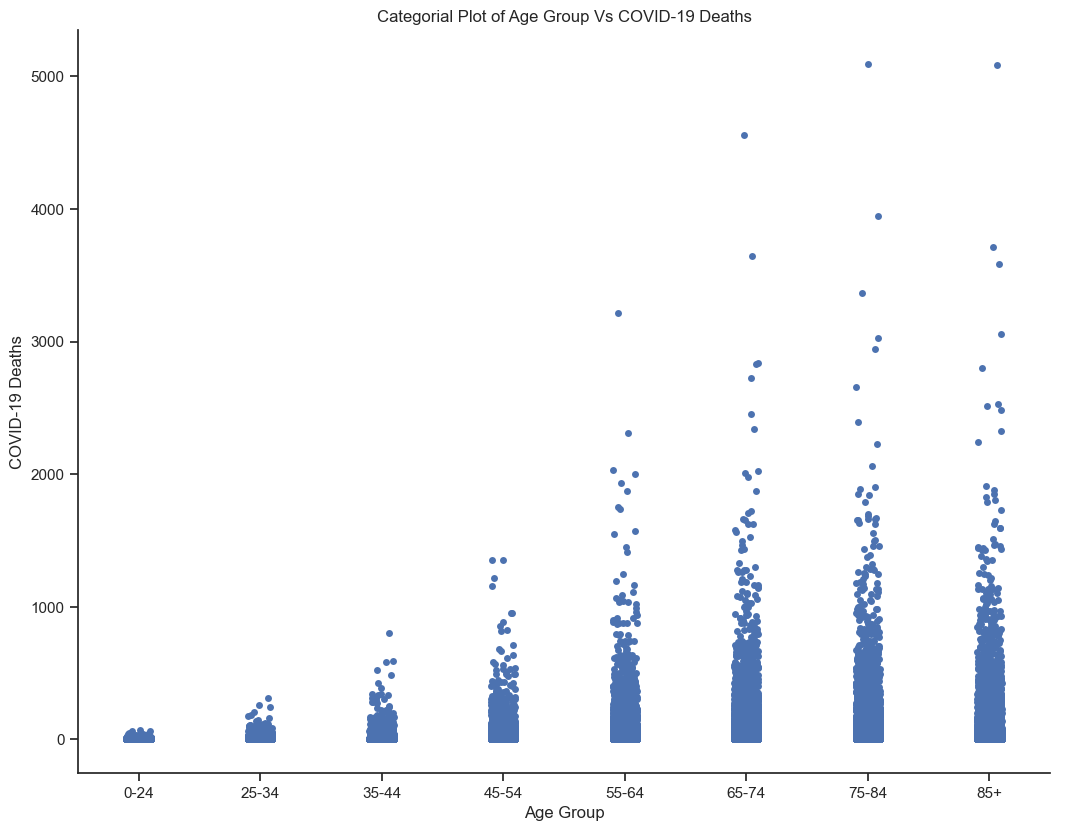

In [14]:
# create a categorial plot of Age Group Vs COVID-19 Deaths
sns.set(style='ticks')
categorialplot =sns.catplot(x='Age Group', y='COVID-19 Deaths', data=df,height=8.27, aspect=10.7/8.27) 
plt.title('Categorial Plot of Age Group Vs COVID-19 Deaths')
plt.savefig(os.path.join(path,'Analysis', 'Visualizations', 'barchart_order_dow.png'))

##### The above categorial plot indicates that as age increases, number of COVID-19 Deaths also increases

In [15]:
# create a barchart to identify top 10 States which are highly affected by COVID-19 Deaths
df.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,Age Category
0,09/24/2023,01/01/2020,01/31/2020,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN,Young Age
1,09/24/2023,02/01/2020,02/29/2020,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN,Young Age
2,09/24/2023,03/01/2020,03/31/2020,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN,Young Age
3,09/24/2023,04/01/2020,04/30/2020,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN,Young Age
4,09/24/2023,05/01/2020,05/31/2020,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN,Young Age


C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_11392\3388129485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=top_states.index, y=top_states.values,palette="viridis")


Text(0.5, 1.0, 'Top 10 States affected by COVID-19')

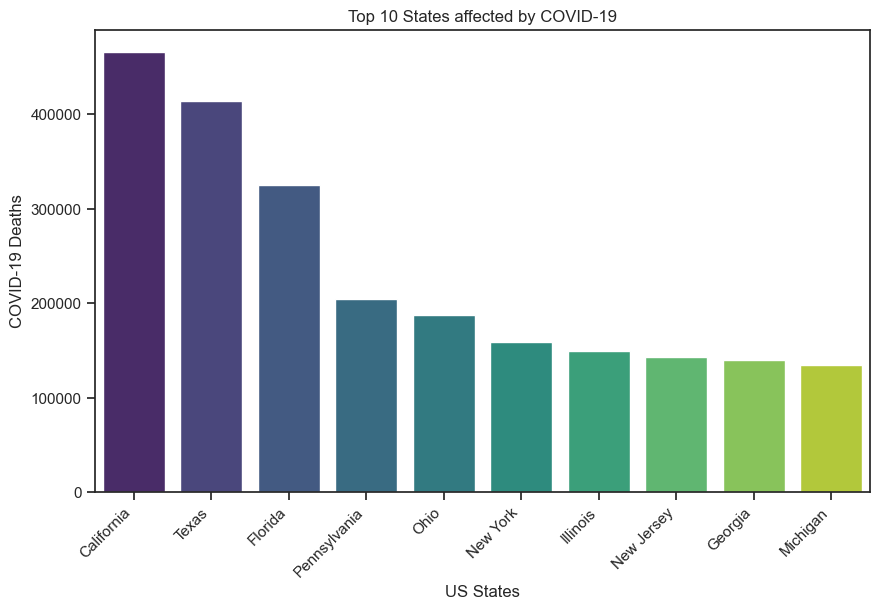

In [18]:
# Find out top 10 States which are affected by COVID-19
top_states = df.groupby('State')['COVID-19 Deaths'].sum().nlargest(10)

#create a barplot
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x=top_states.index, y=top_states.values,palette="viridis")

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('US States')
plt.ylabel('COVID-19 Deaths')
plt.title('Top 10 States affected by COVID-19')

### 7. Answering Questions

##### a) What are the top 5 conditions contributing to COVID-19 deaths?
#####    The top 5 conditions are:
#####          -- COVID-19
#####          -- Respiratory diseases
#####          -- Circulatory diseases
#####          -- All other conditions and causes(residual)
#####          -- Diabetes

##### b) Which age groups are mostly affected by COVID-19?
#####    People above 65+ years of age are highly affected due to COVID-19.

##### c) In which year  was the highest death count due to COVID-19?
#####    Year 2020 and 2021 have the highest death count due to COVID-19

##### d) Which are the top 10 US States that are highly affected by COVID-19?
#####    The top 10 US States are:
#####    - California
#####    - Texas
#####    - Florida
#####    - Pennsylvania
#####    - Ohio
#####    - New York
#####    - Illinios
#####    - New Jersey
#####    - Georgia
#####    - Michigan

#### Additional Questions
##### 1. Is there a relationship between age group and conditions?
##### 2. Is there a seasonality in affecting COVID-19?
##### 3. Is there a relationship between US regions and conditions?


### 8. Define a Hypothesis

#### 'If the number of mentions of conditions on death certificate is higher, then the number of COVID-19 Deaths is also higher'.